In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [68]:
file = pd.read_csv('customer_booking.csv', encoding="ISO-8859-1")
file.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [69]:
# file['flight_day'].unique()
# mapping = {'Mon':1, 'Tue':2,'Wed':3,'Thu':4,'Fri':5,'Sat':6,'Sun':7}
# file['flight_day']= file['flight_day'].map(mapping)

In [70]:
file.shape

(50000, 14)

In [71]:
file.isnull().sum().sum()

0

In [72]:
def ori(data):
    l = len(data)
    data = data[:l//2]
    return data

def dest(data):
    l = len(data)
    data = data[l//2:]
    return data

In [73]:
file['origin'] = file['route'].apply(ori)
file['destination'] = file['route'].apply(dest)
file.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,origin,destination
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0,AKL,DEL
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0,AKL,DEL
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0,AKL,DEL
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0,AKL,DEL
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0,AKL,DEL


In [74]:
for col in file.select_dtypes('object'):
    file[col],_ = file[col].factorize()
file.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,origin,destination
0,2,0,0,262,19,7,0,0,0,1,0,0,5.52,0,0,0
1,1,0,0,112,20,3,0,0,0,0,0,0,5.52,0,0,0
2,2,0,0,243,22,17,1,0,1,1,1,0,5.52,0,0,0
3,1,0,0,96,31,4,0,0,0,0,0,1,5.52,0,0,0
4,2,0,0,68,22,15,1,0,1,1,0,1,5.52,0,0,0


Feature Selection

Splitting route into Origin and destination produces new features to test if origin and destination have any effect on the booking complete by the customer or not. Analysing it by Sklearn package.

In [75]:
from sklearn.feature_selection import mutual_info_classif
x= file[['route','origin','destination']]
y = file['booking_complete']
score = mutual_info_classif(x,y)
info = pd.Series(score)
info.index = x.columns
info.sort_values(ascending= False)

route          0.052545
origin         0.028881
destination    0.019273
dtype: float64

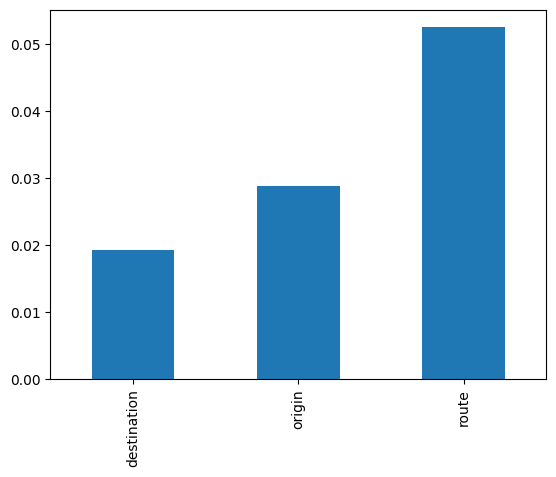

In [76]:
info.sort_values(ascending=True).plot.bar()
plt.savefig('./Results/features.png', bbox_inches = 'tight')

Thus, breaking route into origin and destination doesnt make sense as both these variables are less correlated with Booking complete as compared to route.
Thus, considering Route to be one of the features, Random forest classifier is used to predict customer behaviour for the flight booking.